In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/Combined_Data_181023_data_collection_output_feature_imputation.xlsx")

In [2]:
df

,School Name,LinkedIn Followers,Instagram engagement %,Google Rating,Google Number of Reviews,Research Quality,Citations per Faculty,Average Experience of Faculty,Students per Staff,International board (%) 2022,...,Women on board Change,International faculty Change,International students Change,Female students (%) 2022 Change,Female faculty (%) 2022 Change,Women on board (%) 2022 Change,Satisfaction Change,International students (%) 2022 Change,International faculty (%) 2022 Change,International board (%) 2022 Change
0,University of St Gallen,114985.0,0.68,4.5,217.0,81.4,22.8,10.0,12.9,53.0,...,-0.333333,-1.000000,2.333333,-1.909091,-1.909091,-1.909091,0.110,-3.636364,-3.636364,-3.636364
1,HEC Paris,289801.0,0.91,4.4,265.0,38.8,67.3,10.0,NaN,83.0,...,0.000000,1.666667,-0.666667,-0.272727,-0.272727,-0.272727,0.145,2.454545,2.454545,2.454545
2,London Business School,536866.0,0.45,4.8,322.0,95.4,55.5,11.0,12.6,81.0,...,0.666667,-0.333333,0.000000,1.111111,1.111111,1.111111,-0.155,-1.818182,-1.818182,-1.818182
3,Essec Business School,190577.0,3.28,4.4,266.0,24.9,76.5,10.0,19.4,87.0,...,-5.000000,-4.666667,-2.666667,1.333333,1.333333,1.333333,0.180,0.818182,0.818182,0.818182
4,ESCP Business School,184493.0,1.77,4.2,104.0,NaN,81.1,10.0,NaN,95.0,...,-9.666667,-2.000000,-2.000000,-1.000000,-1.000000,-1.000000,-0.105,-4.454545,-4.454545,-4.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Esdes Lyon Business School,15666.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,38.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
121,Rabat Business School,6604.0,1.50,4.4,156.0,75.0,20.0,9.0,16.1,90.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
122,Lucerne School of Business,711.0,1.20,4.5,256.0,85.0,25.0,10.0,15.1,12.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000
123,"NMIMS Mumbai, School of Business Management",197425.0,1.50,4.4,1265.0,85.0,100.0,NaN,NaN,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000


In [3]:
df.shape

(125, 60)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   School Name                                     125 non-null    object 
 1   LinkedIn Followers                              123 non-null    float64
 2   Instagram engagement %                          110 non-null    float64
 3   Google Rating                                   113 non-null    float64
 4   Google Number of Reviews                        107 non-null    float64
 5   Research Quality                                87 non-null     float64
 6   Citations per Faculty                           102 non-null    float64
 7   Average Experience of Faculty                   110 non-null    float64
 8   Students per Staff                              78 non-null     float64
 9   International board (%) 2022               

In [5]:
df.isna().sum()

School Name                                        0
LinkedIn Followers                                 2
Instagram engagement %                            15
Google Rating                                     12
Google Number of Reviews                          18
Research Quality                                  38
Citations per Faculty                             23
Average Experience of Faculty                     15
Students per Staff                                47
International board (%) 2022                      25
Threeyear average 2022                            25
Faculty with doctorates (%) 2022                  25
Faculty with doctorates (%) 2021                  25
Rank in 2022                                      25
Overall satisfaction 2022                         25
Overall satisfaction 2021                         25
Women on board (%) 2022                           25
Female faculty (%) 2022                           25
Salary percentage increase 2022               

Dropping the null rows as they are useless for us in the analysis

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

School Name                                       0
LinkedIn Followers                                0
Instagram engagement %                            0
Google Rating                                     0
Google Number of Reviews                          0
Research Quality                                  0
Citations per Faculty                             0
Average Experience of Faculty                     0
Students per Staff                                0
International board (%) 2022                      0
Threeyear average 2022                            0
Faculty with doctorates (%) 2022                  0
Faculty with doctorates (%) 2021                  0
Rank in 2022                                      0
Overall satisfaction 2022                         0
Overall satisfaction 2021                         0
Women on board (%) 2022                           0
Female faculty (%) 2022                           0
Salary percentage increase 2022                   0
Salary perce

In [8]:
df.describe()

,LinkedIn Followers,Instagram engagement %,Google Rating,Google Number of Reviews,Research Quality,Citations per Faculty,Average Experience of Faculty,Students per Staff,International board (%) 2022,Threeyear average 2022,...,Women on board Change,International faculty Change,International students Change,Female students (%) 2022 Change,Female faculty (%) 2022 Change,Women on board (%) 2022 Change,Satisfaction Change,International students (%) 2022 Change,International faculty (%) 2022 Change,International board (%) 2022 Change
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,76068.872727,1.977636,4.421818,179.272727,78.492727,36.525455,11.963636,18.010909,41.581818,35.945455,...,-0.821212,-1.063636,-0.360606,-0.797107,-0.797107,-0.797107,0.001455,-0.525620,-0.525620,-0.525620
std,87948.300231,1.133301,0.281984,304.711731,14.864074,21.665506,2.202386,8.007096,25.543493,30.584079,...,4.867044,3.076108,4.366653,3.378856,3.378856,3.378856,0.164087,3.997384,3.997384,3.997384
min,39.000000,0.410000,3.700000,2.000000,24.100000,18.000000,8.000000,10.500000,0.000000,0.000000,...,-28.000000,-14.000000,-15.000000,-19.000000,-19.000000,-19.000000,-0.375000,-11.000000,-11.000000,-11.000000
25%,25603.000000,1.200000,4.300000,66.500000,75.000000,21.000000,10.000000,14.700000,20.000000,2.500000,...,-1.833333,-2.500000,-2.166667,-1.651515,-1.651515,-1.651515,-0.087500,-2.916667,-2.916667,-2.916667
50%,42185.000000,1.500000,4.500000,125.000000,80.000000,24.000000,13.000000,15.100000,42.000000,31.000000,...,0.000000,-0.666667,0.000000,-0.181818,-0.181818,-0.181818,0.000000,-0.181818,-0.181818,-0.181818
75%,106543.000000,2.695000,4.600000,198.000000,85.000000,51.250000,14.000000,16.300000,62.500000,66.000000,...,0.833333,0.333333,1.333333,1.111111,1.111111,1.111111,0.085000,0.909091,0.909091,0.909091
max,536866.000000,5.000000,5.000000,2255.000000,96.900000,93.500000,15.000000,57.100000,90.000000,92.000000,...,8.000000,5.000000,11.000000,5.000000,5.000000,5.000000,0.640000,16.200000,16.200000,16.200000


In [9]:
Top_10= df.head(10)
Top_10

,School Name,LinkedIn Followers,Instagram engagement %,Google Rating,Google Number of Reviews,Research Quality,Citations per Faculty,Average Experience of Faculty,Students per Staff,International board (%) 2022,...,Women on board Change,International faculty Change,International students Change,Female students (%) 2022 Change,Female faculty (%) 2022 Change,Women on board (%) 2022 Change,Satisfaction Change,International students (%) 2022 Change,International faculty (%) 2022 Change,International board (%) 2022 Change
0,University of St Gallen,114985.0,0.68,4.5,217.0,81.4,22.8,10.0,12.9,53.0,...,-0.333333,-1.000000,2.333333,-1.909091,-1.909091,-1.909091,0.110,-3.636364,-3.636364,-3.636364
2,London Business School,536866.0,0.45,4.8,322.0,95.4,55.5,11.0,12.6,81.0,...,0.666667,-0.333333,0.000000,1.111111,1.111111,1.111111,-0.155,-1.818182,-1.818182,-1.818182
3,Essec Business School,190577.0,3.28,4.4,266.0,24.9,76.5,10.0,19.4,87.0,...,-5.000000,-4.666667,-2.666667,1.333333,1.333333,1.333333,0.180,0.818182,0.818182,0.818182
5,SDA Bocconi/Università Bocconi,308968.0,0.65,4.7,196.0,68.2,81.0,10.0,13.3,70.0,...,-0.333333,-2.000000,-2.333333,-1.555556,-1.555556,-1.555556,-0.040,2.272727,2.272727,2.272727
6,University College Dublin: Smurfit,36932.0,0.86,4.5,103.0,84.0,38.9,10.0,20.7,55.0,...,2.000000,-1.000000,0.666667,2.333333,2.333333,2.333333,-0.130,-2.636364,-2.636364,-2.636364
7,"Rotterdam School of Management, Erasmus Univer...",97316.0,1.76,4.5,103.0,96.9,53.4,10.0,36.0,12.0,...,-4.000000,0.333333,4.333333,-2.454545,-2.454545,-2.454545,-0.090,-3.272727,-3.272727,-3.272727
13,University of Mannheim,72418.0,2.43,4.5,374.0,90.2,45.1,10.0,57.1,20.0,...,0.000000,0.333333,-0.333333,1.909091,1.909091,1.909091,0.165,-3.181818,-3.181818,-3.181818
15,WHU – Otto Beisheim School of Management,34891.0,2.76,4.6,140.0,24.8,79.7,10.0,31.3,12.0,...,-2.333333,-1.333333,-1.000000,-1.636364,-1.636364,-1.636364,-0.005,-1.454545,-1.454545,-1.454545
20,Warwick Business School,96046.0,1.36,4.8,103.0,89.0,49.0,10.0,14.4,38.0,...,0.666667,-0.666667,-1.666667,-1.222222,-1.222222,-1.222222,0.075,-6.636364,-6.636364,-6.636364
26,The University of Sydney Business School,39724.0,1.41,4.7,71.0,92.0,93.5,10.0,23.1,25.0,...,4.333333,1.000000,0.000000,2.111111,2.111111,2.111111,0.640,-4.454545,-4.454545,-4.454545


In [10]:
from pandas_summary import DataFrameSummary

# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the summary
summary = DataFrameSummary(numeric_df)
print(summary.summary())


             LinkedIn Followers Instagram engagement % Google Rating  \
count                      55.0                   55.0          55.0   
mean               76068.872727               1.977636      4.421818   
std                87948.300231               1.133301      0.281984   
min                        39.0                   0.41           3.7   
25%                     25603.0                    1.2           4.3   
50%                     42185.0                    1.5           4.5   
75%                    106543.0                  2.695           4.6   
max                    536866.0                    5.0           5.0   
counts                       55                     55            55   
uniques                      55                     43            12   
missing                       0                      0             0   
missing_perc                 0%                     0%            0%   
types                   numeric                numeric       num

In [11]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('report_new.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
C:\Users\gupta\anaconda3\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

Report report_new.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


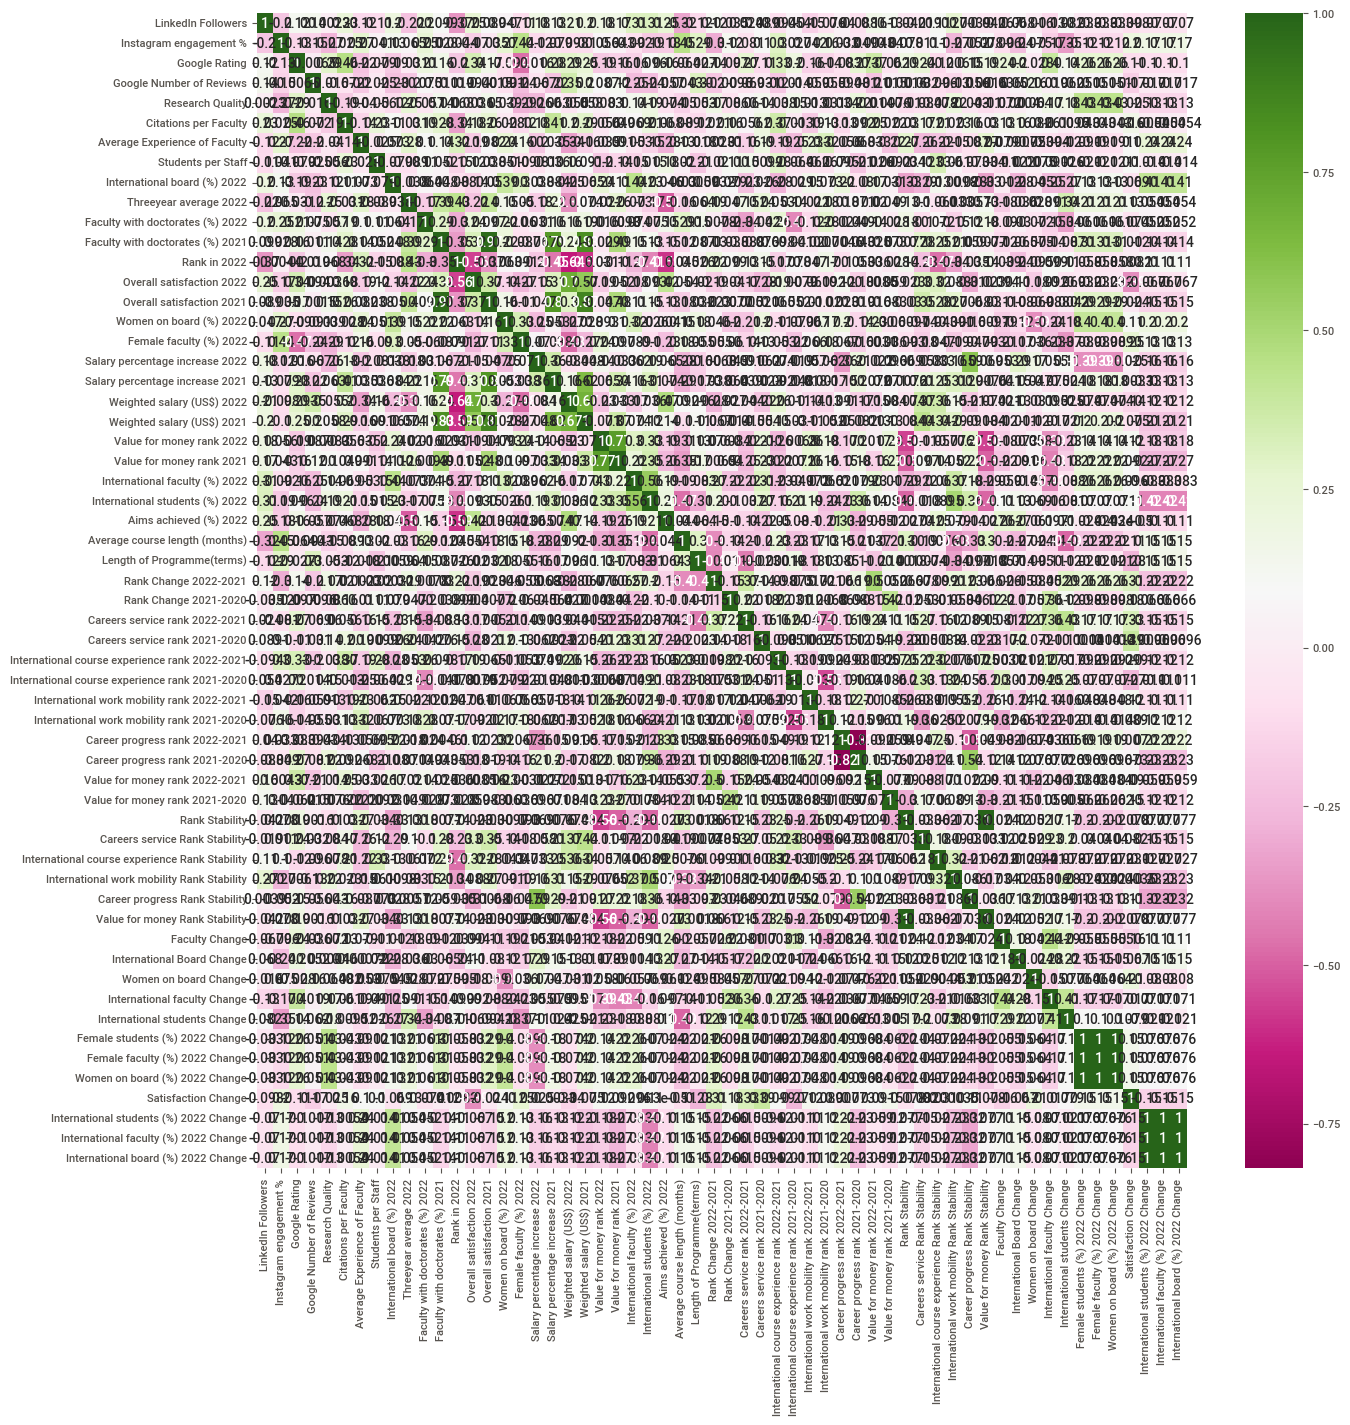

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create a correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='PiYG')
plt.show()

In [14]:
corr_matrix =df.select_dtypes(include=['number']).corr()

# Get highly correlated pairs
highly_correlated = (corr_matrix.stack().sort_values(ascending=False)
                     .reset_index()
                     .rename(columns={0: 'correlation'}))
highly_correlated = highly_correlated[highly_correlated['correlation'] < 1.0]

# You can set a threshold to define what you consider as "highly correlated"
threshold = 0.7  
highly_correlated = highly_correlated[highly_correlated['correlation'] > threshold]

# Print or further analyze the highly correlated pairs
print(highly_correlated)

                             level_0                           level_1  \
72  Faculty with doctorates (%) 2021         Overall satisfaction 2021   
73         Overall satisfaction 2021  Faculty with doctorates (%) 2021   
74         Overall satisfaction 2021        Weighted salary (US$) 2021   
75        Weighted salary (US$) 2021         Overall satisfaction 2021   
76        Weighted salary (US$) 2021  Faculty with doctorates (%) 2021   
77  Faculty with doctorates (%) 2021        Weighted salary (US$) 2021   
78   Salary percentage increase 2021         Overall satisfaction 2021   
79         Overall satisfaction 2021   Salary percentage increase 2021   
80   Salary percentage increase 2021  Faculty with doctorates (%) 2021   
81  Faculty with doctorates (%) 2021   Salary percentage increase 2021   
82         Value for money rank 2021         Value for money rank 2022   
83         Value for money rank 2022         Value for money rank 2021   

    correlation  
72     0.970061  
7

In [15]:
corr_matrix =df.select_dtypes(include=['number']).corr()

# Get highly correlated pairs
highly_correlated = (corr_matrix.stack().sort_values(ascending=False)
                     .reset_index()
                     .rename(columns={0: 'correlation'}))
highly_correlated = highly_correlated[highly_correlated['correlation'] < 1.0]

# You can set a threshold to define what you consider as "highly correlated"
threshold = -0.7  
highly_correlated = highly_correlated[highly_correlated['correlation'] < threshold]

# Print or further analyze the highly correlated pairs
print(highly_correlated)

                             level_0                         level_1  \
3362  Career progress rank 2022-2021  Career progress rank 2021-2020   
3363  Career progress rank 2021-2020  Career progress rank 2022-2021   

      correlation  
3362    -0.820503  
3363    -0.820503  


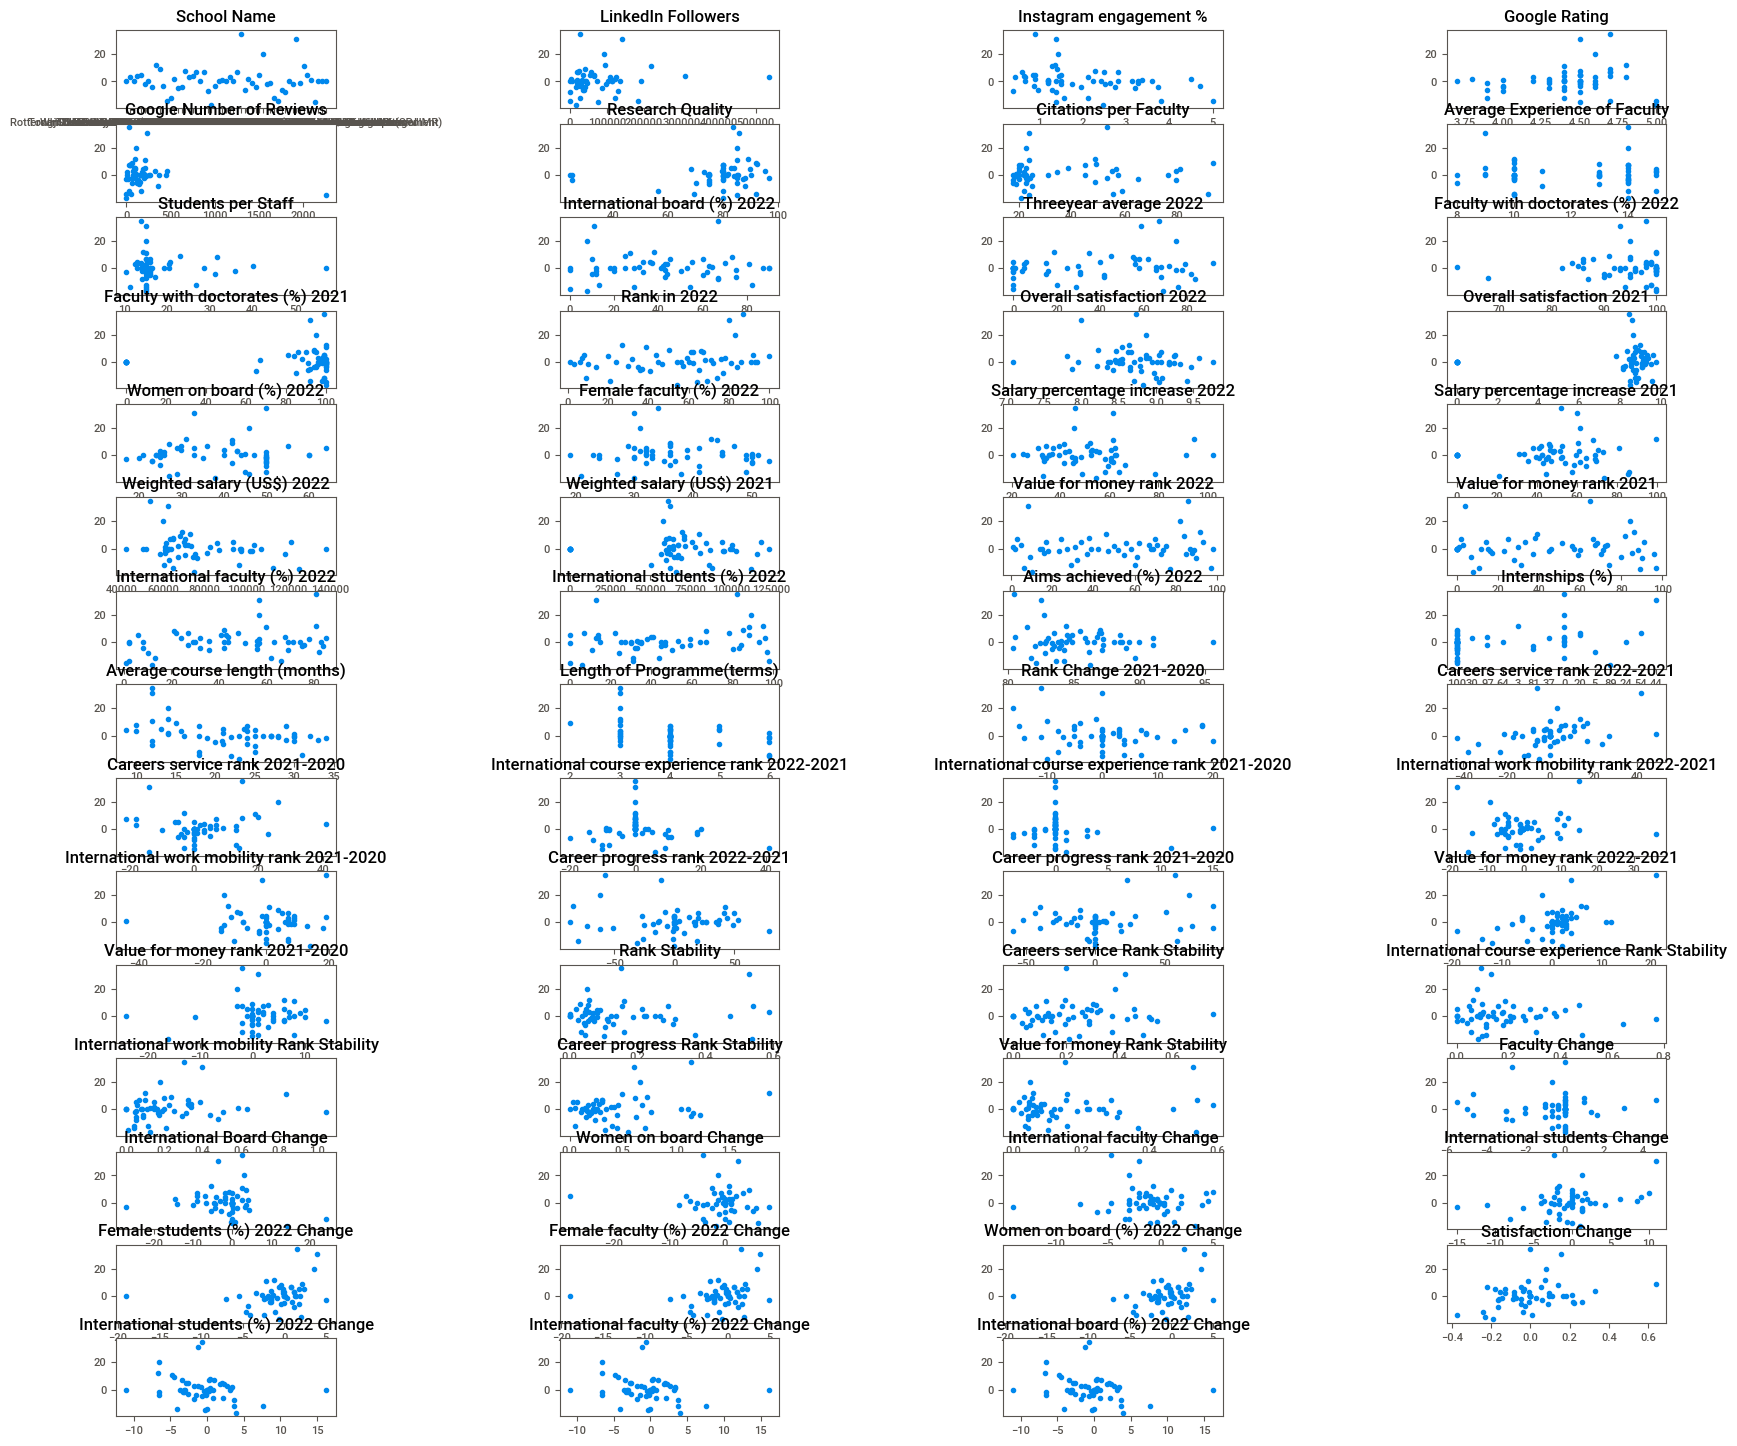

In [16]:
n_cols = len(df.columns)  
n_rows = (n_cols - 1) // 4 + 1  
plt.figure(figsize=(20, 18))
for index, column in enumerate(df.drop('Rank Change 2022-2021', axis=1).columns):
    plt.subplot(n_rows, 4, index + 1)  # Adjust the grid size
    plt.scatter(x=column, y='Rank Change 2022-2021', data=df)
    plt.title(column)

plt.subplots_adjust(wspace=1.02, hspace=0.2)
plt.show()

preprocess the data

In [17]:
df.columns

Index(['School Name', 'LinkedIn Followers', 'Instagram engagement %',
       'Google Rating', 'Google Number of Reviews', 'Research Quality',
       'Citations per Faculty', 'Average Experience of Faculty',
       'Students per Staff', 'International board (%) 2022',
       'Threeyear average 2022', 'Faculty with doctorates (%) 2022',
       'Faculty with doctorates (%) 2021', 'Rank in 2022',
       'Overall satisfaction 2022', 'Overall satisfaction 2021',
       'Women on board (%) 2022', 'Female faculty (%) 2022',
       'Salary percentage increase 2022', 'Salary percentage increase 2021',
       'Weighted salary (US$) 2022', 'Weighted salary (US$) 2021',
       'Value for money rank 2022', 'Value for money rank 2021',
       'International faculty (%) 2022', 'International students (%) 2022',
       'Aims achieved (%) 2022', 'Internships (%)',
       'Average course length (months)', 'Length of Programme(terms)',
       'Rank Change 2022-2021', 'Rank Change 2021-2020',
       'Caree

In [18]:
numeric_features = ['LinkedIn Followers', 'Instagram engagement %',
       'Google Rating', 'Google Number of Reviews', 'Research Quality',
       'Citations per Faculty', 'Average Experience of Faculty',
       'Students per Staff', 'International board (%) 2022',
       'Threeyear average 2022', 'Faculty with doctorates (%) 2022',
       'Faculty with doctorates (%) 2021',
       'Overall satisfaction 2022', 'Overall satisfaction 2021',
       'Women on board (%) 2022', 'Female faculty (%) 2022',
       'Salary percentage increase 2022', 'Salary percentage increase 2021',
       'Weighted salary (US$) 2022', 'Weighted salary (US$) 2021',
       'Value for money rank 2022', 'Value for money rank 2021',
       'International faculty (%) 2022', 'International students (%) 2022',
       'Aims achieved (%) 2022', 'Internships (%)',
       'Average course length (months)', 'Length of Programme(terms)',
       'Rank Change 2022-2021', 'Rank Change 2021-2020',
       'Careers service rank 2022-2021', 'Careers service rank 2021-2020',
       'International course experience rank 2022-2021',
       'International course experience rank 2021-2020',
       'International work mobility rank 2022-2021',
       'International work mobility rank 2021-2020',
       'Career progress rank 2022-2021', 'Career progress rank 2021-2020',
       'Value for money rank 2022-2021', 'Value for money rank 2021-2020',
       'Rank Stability', 'Careers service Rank Stability',
       'International course experience Rank Stability',
       'International work mobility Rank Stability',
       'Career progress Rank Stability', 'Value for money Rank Stability',
       'Faculty Change', 'International Board Change', 'Women on board Change',
       'International faculty Change', 'International students Change',
       'Female students (%) 2022 Change', 'Female faculty (%) 2022 Change',
       'Women on board (%) 2022 Change', 'Satisfaction Change',
       'International students (%) 2022 Change',
       'International faculty (%) 2022 Change',
       'International board (%) 2022 Change']

target =  'Rank in 2022'
X = df[numeric_features]
y = df[target]

In [19]:
X

,LinkedIn Followers,Instagram engagement %,Google Rating,Google Number of Reviews,Research Quality,Citations per Faculty,Average Experience of Faculty,Students per Staff,International board (%) 2022,Threeyear average 2022,...,Women on board Change,International faculty Change,International students Change,Female students (%) 2022 Change,Female faculty (%) 2022 Change,Women on board (%) 2022 Change,Satisfaction Change,International students (%) 2022 Change,International faculty (%) 2022 Change,International board (%) 2022 Change
0,114985.0,0.68,4.5,217.0,81.4,22.8,10.0,12.9,53.0,1.0,...,-0.333333,-1.000000,2.333333,-1.909091,-1.909091,-1.909091,0.110,-3.636364,-3.636364,-3.636364
2,536866.0,0.45,4.8,322.0,95.4,55.5,11.0,12.6,81.0,5.0,...,0.666667,-0.333333,0.000000,1.111111,1.111111,1.111111,-0.155,-1.818182,-1.818182,-1.818182
3,190577.0,3.28,4.4,266.0,24.9,76.5,10.0,19.4,87.0,5.0,...,-5.000000,-4.666667,-2.666667,1.333333,1.333333,1.333333,0.180,0.818182,0.818182,0.818182
5,308968.0,0.65,4.7,196.0,68.2,81.0,10.0,13.3,70.0,15.0,...,-0.333333,-2.000000,-2.333333,-1.555556,-1.555556,-1.555556,-0.040,2.272727,2.272727,2.272727
6,36932.0,0.86,4.5,103.0,84.0,38.9,10.0,20.7,55.0,6.0,...,2.000000,-1.000000,0.666667,2.333333,2.333333,2.333333,-0.130,-2.636364,-2.636364,-2.636364
7,97316.0,1.76,4.5,103.0,96.9,53.4,10.0,36.0,12.0,4.0,...,-4.000000,0.333333,4.333333,-2.454545,-2.454545,-2.454545,-0.090,-3.272727,-3.272727,-3.272727
13,72418.0,2.43,4.5,374.0,90.2,45.1,10.0,57.1,20.0,25.0,...,0.000000,0.333333,-0.333333,1.909091,1.909091,1.909091,0.165,-3.181818,-3.181818,-3.181818
15,34891.0,2.76,4.6,140.0,24.8,79.7,10.0,31.3,12.0,15.0,...,-2.333333,-1.333333,-1.000000,-1.636364,-1.636364,-1.636364,-0.005,-1.454545,-1.454545,-1.454545
20,96046.0,1.36,4.8,103.0,89.0,49.0,10.0,14.4,38.0,19.0,...,0.666667,-0.666667,-1.666667,-1.222222,-1.222222,-1.222222,0.075,-6.636364,-6.636364,-6.636364
26,39724.0,1.41,4.7,71.0,92.0,93.5,10.0,23.1,25.0,45.0,...,4.333333,1.000000,0.000000,2.111111,2.111111,2.111111,0.640,-4.454545,-4.454545,-4.454545


In [20]:
y

0        1.0
2        7.0
3        6.0
5       20.0
6        8.0
7        3.0
13      24.0
15      14.0
20      27.0
26      50.0
27      30.0
35      21.0
39       9.0
41      32.0
42      37.0
43      35.0
44      66.0
45      59.0
48     100.0
50      67.0
51      56.0
52      61.0
53      41.0
56      54.0
57      57.0
58      94.0
59      71.0
61      60.0
62      78.0
63      54.0
65      62.0
66      87.0
67      65.0
68      76.0
70      72.0
71      84.0
72      92.0
73      83.0
75      47.0
76      62.0
77      74.0
81      69.0
93      36.0
94      77.0
97      93.0
100     10.0
101     80.0
102     81.0
103     39.0
108     44.0
110     68.0
114     64.0
118     45.0
121     86.0
122     91.0
Name: Rank in 2022, dtype: float64

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression model

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.14205163043697122


an R2 score of approximately 0.142 indicates that your regression model explains about 14.2% of the variance in the target variable. This means that your model's predictions are not very accurate in explaining the variability in the data. The rest of the variance is unexplained and might be due to factors or noise that your model doesn't account for.

In [24]:
feature_names =  ['LinkedIn Followers', 'Instagram engagement %',
       'Google Rating', 'Google Number of Reviews', 'Research Quality',
       'Citations per Faculty', 'Average Experience of Faculty',
       'Students per Staff', 'International board (%) 2022',
       'Threeyear average 2022', 'Faculty with doctorates (%) 2022',
       'Faculty with doctorates (%) 2021',
       'Overall satisfaction 2022', 'Overall satisfaction 2021',
       'Women on board (%) 2022', 'Female faculty (%) 2022',
       'Salary percentage increase 2022', 'Salary percentage increase 2021',
       'Weighted salary (US$) 2022', 'Weighted salary (US$) 2021',
       'Value for money rank 2022', 'Value for money rank 2021',
       'International faculty (%) 2022', 'International students (%) 2022',
       'Aims achieved (%) 2022', 'Internships (%)',
       'Average course length (months)', 'Length of Programme(terms)',
       'Rank Change 2022-2021', 'Rank Change 2021-2020',
       'Careers service rank 2022-2021', 'Careers service rank 2021-2020',
       'International course experience rank 2022-2021',
       'International course experience rank 2021-2020',
       'International work mobility rank 2022-2021',
       'International work mobility rank 2021-2020',
       'Career progress rank 2022-2021', 'Career progress rank 2021-2020',
       'Value for money rank 2022-2021', 'Value for money rank 2021-2020',
       'Rank Stability', 'Careers service Rank Stability',
       'International course experience Rank Stability',
       'International work mobility Rank Stability',
       'Career progress Rank Stability', 'Value for money Rank Stability',
       'Faculty Change', 'International Board Change', 'Women on board Change',
       'International faculty Change', 'International students Change',
       'Female students (%) 2022 Change', 'Female faculty (%) 2022 Change',
       'Women on board (%) 2022 Change', 'Satisfaction Change',
       'International students (%) 2022 Change',
       'International faculty (%) 2022 Change',
       'International board (%) 2022 Change']

# Create a DataFrame with coefficients and feature names
df_coeff_ = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr.coef_})

# Sort the DataFrame by absolute coefficient values
df_coeff_['Absolute_Coefficient'] = abs(df_coeff_['Coefficient'])
df_coeff_ = df_coeff_.sort_values('Absolute_Coefficient', ascending=False)

# Display the sorted DataFrame
print(df_coeff_)

                                           Feature  Coefficient  \
23                 International students (%) 2022   -11.739374   
18                      Weighted salary (US$) 2022   -11.680945   
28                           Rank Change 2022-2021    10.884036   
14                         Women on board (%) 2022     8.779701   
1                           Instagram engagement %     7.863035   
9                           Threeyear average 2022     6.812655   
29                           Rank Change 2021-2020     6.681575   
15                         Female faculty (%) 2022    -6.223658   
41                  Careers service Rank Stability    -5.788957   
10                Faculty with doctorates (%) 2022    -5.786432   
2                                    Google Rating     5.438405   
38                  Value for money rank 2022-2021    -5.347174   
17                 Salary percentage increase 2021    -5.134049   
46                                  Faculty Change     5.04988

LassoCV

In [25]:
lasso = LassoCV()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(r2_score(y_test, y_pred))

0.5289177329685711


the R2 score for the LassoCV model is 0.5289. This means that approximately 52.89% of the variance in your dependent variable is explained by the independent variables in the model. In other words, the LassoCV model accounts for about 52.89% of the variability in your data, which is a moderate level of explanatory power.

In [26]:
df_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})

# Sort the DataFrame by absolute coefficient values
df_coef['Absolute_Coefficient'] = abs(df_coef['Coefficient'])
df_coef = df_coef.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the DataFrame
print(df_coef)

                                           Feature  Coefficient  \
18                      Weighted salary (US$) 2022    -7.347111   
17                 Salary percentage increase 2021    -6.129496   
23                 International students (%) 2022    -5.453798   
24                          Aims achieved (%) 2022    -4.990056   
19                      Weighted salary (US$) 2021    -3.728831   
25                                 Internships (%)    -2.756354   
8                     International board (%) 2022    -1.840550   
9                           Threeyear average 2022     1.760073   
10                Faculty with doctorates (%) 2022    -1.106976   
5                            Citations per Faculty    -0.970822   
48                           Women on board Change    -0.721154   
0                               LinkedIn Followers    -0.660154   
1                           Instagram engagement %    -0.467378   
31                  Careers service rank 2021-2020     0.40174

RidgeCV

In [27]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(r2_score(y_test,y_pred))

0.4449249490305319


This means that approximately 44.49% of the variance in your dependent variable is explained by the independent variables in the model. In other words, the RidgeCV model accounts for about 44.49% of the variability in your data, which is a moderate level of explanatory power.

In [28]:
df_coeff = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge.coef_})

# Sort the DataFrame by absolute coefficient values
df_coeff['Absolute_Coefficient'] = abs(df_coeff['Coefficient'])
df_coeff = df_coeff.sort_values(by='Absolute_Coefficient', ascending=False)

print(df_coeff)

                                           Feature  Coefficient  \
23                 International students (%) 2022    -5.599398   
18                      Weighted salary (US$) 2022    -5.020947   
19                      Weighted salary (US$) 2021    -3.608441   
9                           Threeyear average 2022     3.432610   
24                          Aims achieved (%) 2022    -3.429943   
22                  International faculty (%) 2022    -3.364961   
43      International work mobility Rank Stability    -3.202465   
28                           Rank Change 2022-2021     3.117458   
44                  Career progress Rank Stability    -2.885749   
25                                 Internships (%)    -2.679635   
0                               LinkedIn Followers    -2.488233   
48                           Women on board Change    -2.238315   
5                            Citations per Faculty    -2.221148   
29                           Rank Change 2021-2020     2.17623

In [29]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits =6, shuffle=True, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
print(logit.score(X_test, y_test))

0.0


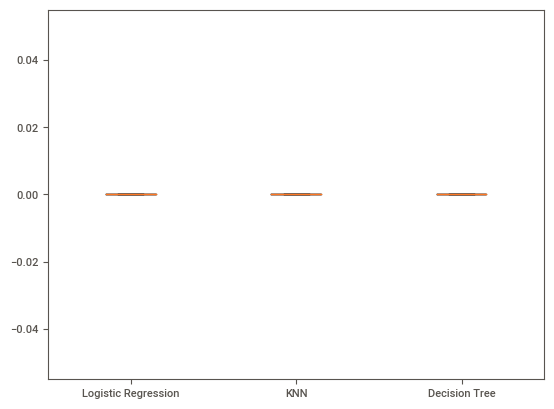

In [31]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [32]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.0
KNN Test Set Accuracy: 0.0
Decision Tree Test Set Accuracy: 0.0


In [33]:
y_lr_pred = logit.predict(X_test)
print(r2_score(y_test,y_pred))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.